In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df=pd.read_csv('bankloans.csv')

In [4]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
df.shape

(850, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [7]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [8]:
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.012983,0.554241,0.599949,0.476218,0.008240,0.278907,0.337841,-0.137657
ed,0.012983,1.000000,-0.151117,0.052927,0.218219,0.008053,0.099080,0.140937,0.114676
employ,0.554241,-0.151117,1.000000,0.344664,0.625093,-0.033625,0.381741,0.414431,-0.282978
address,0.599949,0.052927,0.344664,1.000000,0.308340,-0.032939,0.161641,0.185481,-0.164451
income,0.476218,0.218219,0.625093,0.308340,1.000000,-0.035585,0.551515,0.603352,-0.070970
debtinc,0.008240,0.008053,-0.033625,-0.032939,-0.035585,1.000000,0.514965,0.572548,0.389575
creddebt,0.278907,0.099080,0.381741,0.161641,0.551515,0.514965,1.000000,0.644952,0.244740
othdebt,0.337841,0.140937,0.414431,0.185481,0.603352,0.572548,0.644952,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


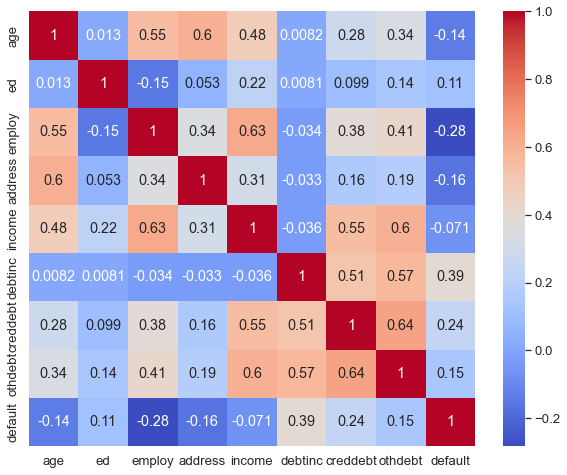

In [9]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

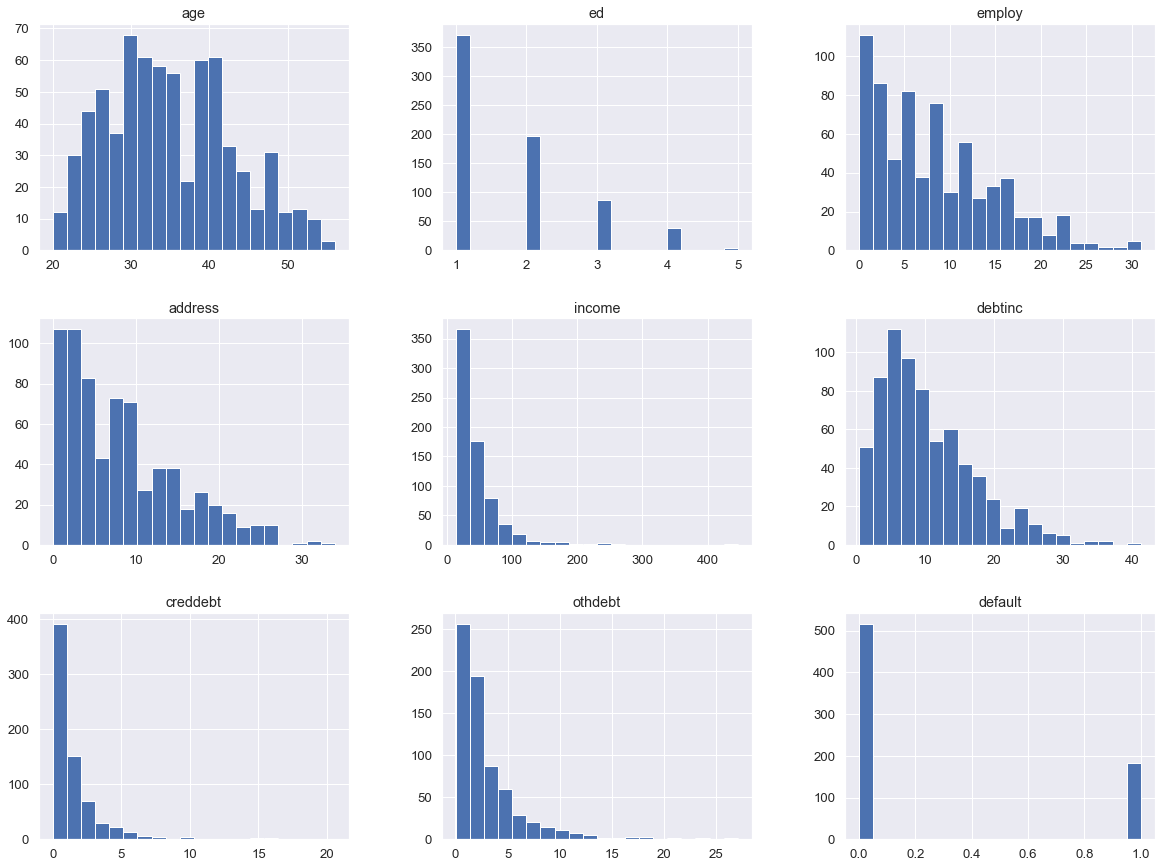

In [28]:
df.hist(bins=20, figsize=(20,15))
plt.show()


In [10]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [11]:
# drop the rows with missing values
df.dropna(inplace=True)

In [12]:
df.shape

(700, 9)

In [13]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [16]:
x=df.drop('default',axis=1)
y=df['default']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
model=LogisticRegression()

In [22]:
model.fit(x_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print(training_data_accuracy)


0.8214285714285714


In [24]:
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print(test_data_accuracy)

0.8071428571428572
